In [1]:
data_path = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/"

In [2]:
from Tool_Functions.cleaning_data import * 

from Clustering.new_data_set_all import * 
from Clustering.viualize_datas import * 
from Clustering.new_data_set_all import *

from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
def clean_new_df(data_path):
    df = file_to_dataframe(data_path + 'New_abos.csv')
    df = df.rename( columns= {'DAT_MVT_REELLE' : 'DATE_ACTE_REEL'})
    df['DATE_ACTE_REEL'] = pd.to_datetime(df['DATE_ACTE_REEL'])
    save_to_csv_file(df, data_path + 'new_abos.csv')
    return True
    

In [25]:
clean_new_df(data_path)

True

In [93]:
new = file_to_dataframe(data_path + "new_abos.csv")
new

,DATE_ACTE_REEL,ID_ABONNE
0,2023-11-01,50950213101
1,2023-11-01,50955287201
2,2023-11-01,50960236001
3,2023-11-01,50977036901
4,2023-11-01,50933674101
...,...,...
458816,2023-11-28,52058240301
458817,2023-11-10,50416372502
458818,2023-11-25,51943996401
458819,2023-11-23,52221512101


In [119]:
new = file_to_dataframe(data_path + "new_abos.csv")
cluster_id = file_to_dataframe(data_path + "Clustering_results/final_partiel/clusters_id_partiel.csv")
cluster_id_all = file_to_dataframe(data_path + "Clustering_results/final_total/clusters_id_all.csv")
df = join_dataFrames(new, cluster_id, 'ID_ABONNE')
df.groupby(['Cluster_8']).count()

,DATE_ACTE_REEL,ID_ABONNE
Cluster_8,,
0,3547,3547
1,1362,1362
2,6072,6072
3,7502,7502
4,1822,1822
5,6509,6509
6,5493,5493
7,7430,7430


In [120]:
df2 = join_dataFrames(new, cluster_id_all, 'ID_ABONNE')
df2.groupby(['KMEANS']).count()

,DATE_ACTE_REEL,ID_ABONNE
KMEANS,,
0,77557,77557
1,12503,12503
2,34150,34150
3,39503,39503
4,54126,54126
5,44802,44802
6,67873,67873
7,63386,63386


1 / graph pour lisibilité
2 / comparer avant et après ODD

In [66]:
def upload_new_df(data_path):
    df_original = file_to_dataframe(data_path + "df_Donnees_Reabos_odd_v2.csv")
    dfn = file_to_dataframe(data_path + 'New_abos.csv')
    df_test = join_dataFrames_outer(df_original,dfn, 'ID_ABONNE')
    df_test['DATE_ACTE_REEL_x'].fillna(df_test['DATE_ACTE_REEL_y'], inplace=True)
    df_test.drop(columns=['DATE_ACTE_REEL_y'], inplace=True)
    df_test = df_test.rename( columns= {'DATE_ACTE_REEL_x' : 'DATE_ACTE_REEL'})
    save_to_csv_file(df_test, data_path + 'all_reabos_nov.csv')
    return True

In [67]:
upload_new_df(data_path)

/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Statapp-CANAL-1/Data_operations/Tool_Functions/join_data.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  datas = pd.read_csv(filename,delimiter=st)


True

In [68]:
def upload_new_df_clusters_partiel(data_path):
    df_test = file_to_dataframe(data_path + 'all_reabos_nov.csv')
    df_id = file_to_dataframe(data_path + 'clusters_id_partiel.csv')
    df_merge = pd.merge(df_test, df_id, on='ID_ABONNE', how='left')
    df_merge['Cluster_8'].fillna('unclustered', inplace=True)
    save_to_csv_file(df_merge, data_path + 'all_reabos_nov_n_clusters.csv')
    return True

In [75]:
def upload_new_df_clusters_total(data_path):
    df_test = file_to_dataframe(data_path + 'all_reabos_nov.csv')
    df_id = file_to_dataframe(data_path + 'clusters_id_all.csv')
    df_merge = pd.merge(df_test, df_id, on='ID_ABONNE', how='left')
    df_merge['KMEANS'].fillna('unclustered', inplace=True)
    save_to_csv_file(df_merge, data_path + 'all_reabos_nov_n_clusters_total.csv')
    return True

In [76]:
upload_new_df_clusters_total(data_path)

/var/folders/md/_fklkl9s1z9gj6bpnwj204y40000gn/T/ipykernel_7197/497429422.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unclustered' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merge['KMEANS'].fillna('unclustered', inplace=True)


True

In [3]:
dfn = file_to_dataframe(data_path + 'New_abos.csv')

In [109]:
odd = dfn[dfn['DATE_ACTE_REEL'] >= '2023-11-14']

In [110]:
odd

,DATE_ACTE_REEL,ID_ABONNE
1308,2023-11-30,52923737701
1309,2023-11-28,52962677501
1310,2023-11-30,52974929601
1311,2023-11-30,52949449801
1312,2023-11-30,52960788501
...,...,...
458815,2023-11-24,52941583801
458816,2023-11-28,52058240301
458818,2023-11-25,51943996401
458819,2023-11-23,52221512101


In [111]:
sg = dfn[dfn['DATE_ACTE_REEL'] < '2023-11-14']

In [112]:
sg

,DATE_ACTE_REEL,ID_ABONNE
0,2023-11-01,50950213101
1,2023-11-01,50955287201
2,2023-11-01,50960236001
3,2023-11-01,50977036901
4,2023-11-01,50933674101
...,...,...
458796,2023-11-11,52915440701
458803,2023-11-12,52802399601
458805,2023-11-01,50414368401
458811,2023-11-04,52287139301


In [113]:
pile = dfn[dfn['DATE_ACTE_REEL'] == '2023-11-14']

In [114]:
pile

,DATE_ACTE_REEL,ID_ABONNE
2656,2023-11-14,50815164501
2663,2023-11-14,50416328801
2682,2023-11-14,50417847801
3281,2023-11-14,51710404301
3301,2023-11-14,53043556101
...,...,...
458365,2023-11-14,53178505601
458464,2023-11-14,52128238901
458514,2023-11-14,52079666001
458649,2023-11-14,52841529401


In [94]:
lejouravant = dfn[dfn['DATE_ACTE_REEL'] == '2023-11-13']
lejouravant

,DATE_ACTE_REEL,ID_ABONNE
1401,2023-11-13,52316100101
2711,2023-11-13,50889463801
7125,2023-11-13,51234623701
7408,2023-11-13,52623223801
10586,2023-11-13,52465014401
...,...,...
457811,2023-11-13,52251995801
458088,2023-11-13,53024112301
458096,2023-11-13,53168543401
458114,2023-11-13,52727782201


In [4]:
df_repartition_promo = count_abo_conditions(dfn,['DATE_ACTE_REEL'],'ID_ABONNE')

In [21]:
df_repartition_promo

,DATE_ACTE_REEL,NB_ID_ABONNE
4,2023-11-05,24696
3,2023-11-04,23067
2,2023-11-03,20284
28,2023-11-29,19745
29,2023-11-30,19462
6,2023-11-07,18490
27,2023-11-28,18229
0,2023-11-01,18177
1,2023-11-02,17581
10,2023-11-11,16752


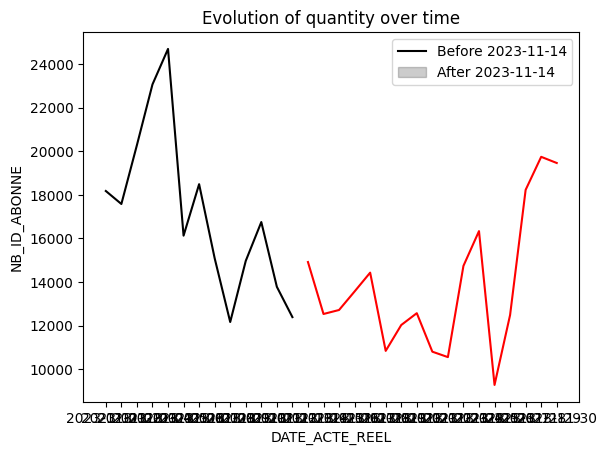

In [6]:
before_date = df_repartition_promo[df_repartition_promo['DATE_ACTE_REEL'] < '2023-11-14']
after_date = df_repartition_promo[df_repartition_promo['DATE_ACTE_REEL'] >= '2023-11-14']

sns.lineplot(x='DATE_ACTE_REEL', y='NB_ID_ABONNE', data=before_date.sort_values(by='DATE_ACTE_REEL'), color='black')
sns.lineplot(x='DATE_ACTE_REEL', y='NB_ID_ABONNE', data=after_date.sort_values(by='DATE_ACTE_REEL'), color='red')

plt.title('Evolution of quantity over time')
plt.xlabel('DATE_ACTE_REEL')
plt.ylabel('NB_ID_ABONNE')
plt.legend(['Before 2023-11-14', 'After 2023-11-14'])
plt.show()

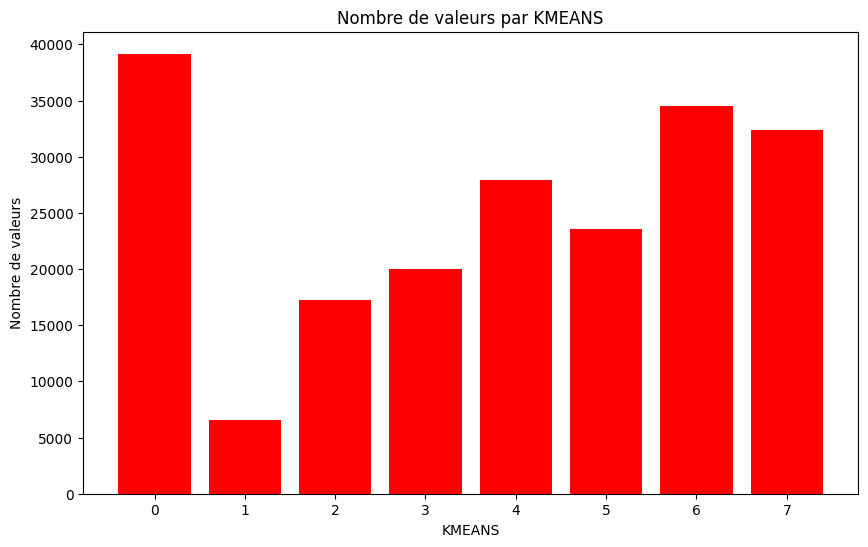

In [128]:
rep_odd = join_dataFrames(odd, cluster_id_all, 'ID_ABONNE')
liste = rep_odd.groupby(['KMEANS']).count()
donnees_odd = pd.DataFrame(liste)
donnees_odd['KMEANS'] = donnees_odd.index

plt.figure(figsize=(10, 6))
plt.bar(donnees_odd['KMEANS'], donnees_odd['ID_ABONNE'], color='red')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donnees_odd['KMEANS'])
plt.show()

In [125]:
rep_sg = join_dataFrames(sg, cluster_id_all, 'ID_ABONNE')
liste = rep_sg.groupby(['KMEANS']).count()
donnees_sg = pd.DataFrame(liste)
donnees_sg['KMEANS'] = donnees_sg.index

plt.figure(figsize=(10, 6))
plt.bar(donnees_sg['KMEANS'], donnees_sg['ID_ABONNE'], color='skyblue')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donnees_sg['KMEANS'])
plt.show()

,DATE_ACTE_REEL,ID_ABONNE,KMEANS
KMEANS,,,
0,38391,38391,0
1,5981,5981,1
2,16941,16941,2
3,19482,19482,3
4,26220,26220,4
5,21276,21276,5
6,33330,33330,6
7,31011,31011,7


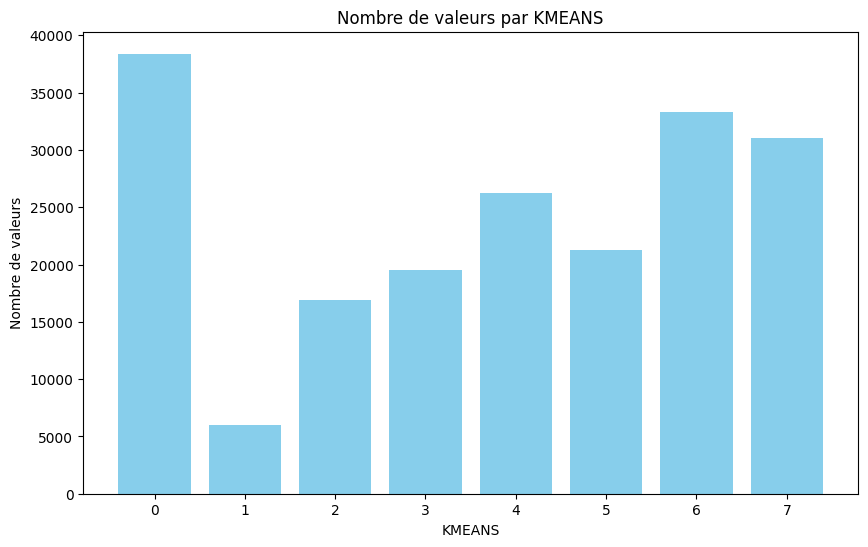

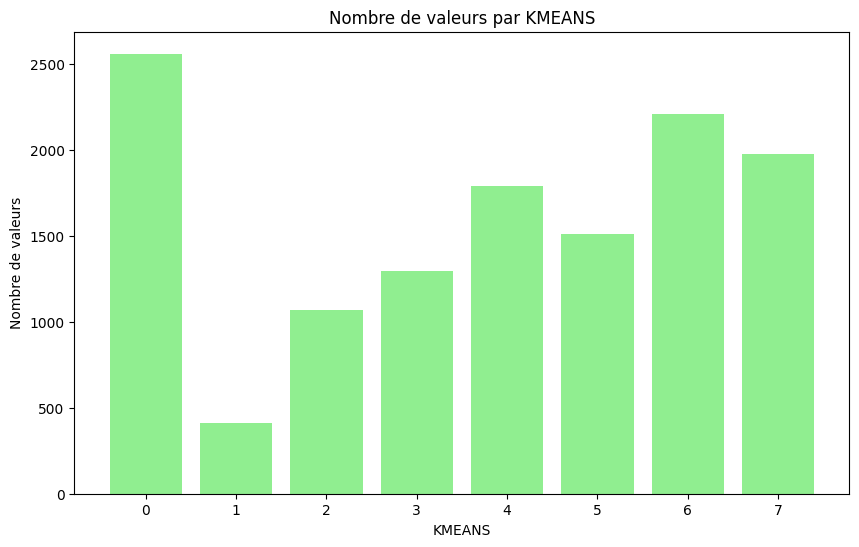

In [130]:
rep_pile = join_dataFrames(pile, cluster_id_all, 'ID_ABONNE')
liste = rep_pile.groupby(['KMEANS']).count()
donnees_pile = pd.DataFrame(liste)
donnees_pile['KMEANS'] = donnees_pile.index

plt.figure(figsize=(10, 6))
plt.bar(donnees_pile['KMEANS'], donnees_pile['ID_ABONNE'], color='lightgreen')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donnees_pile['KMEANS'])
plt.show()

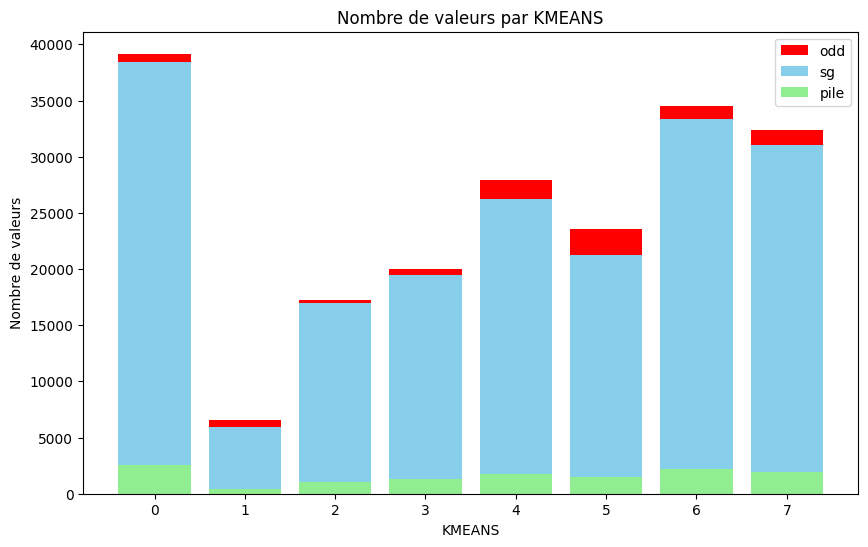

In [131]:
plt.figure(figsize=(10, 6))
plt.bar(donnees_odd['KMEANS'], donnees_odd['ID_ABONNE'], color='red', label='odd')
plt.xlabel('KMEANS')
plt.ylabel('Nombre de valeurs')
plt.title('Nombre de valeurs par KMEANS')
plt.xticks(donnees_odd['KMEANS'])

# Deuxième histogramme
plt.bar(donnees_sg['KMEANS'], donnees_sg['ID_ABONNE'], color='skyblue', label='sg')

# Troisième histogramme
plt.bar(donnees_pile['KMEANS'], donnees_pile['ID_ABONNE'], color='lightgreen', label='pile')

# Ajouter une légende
plt.legend()

plt.show()

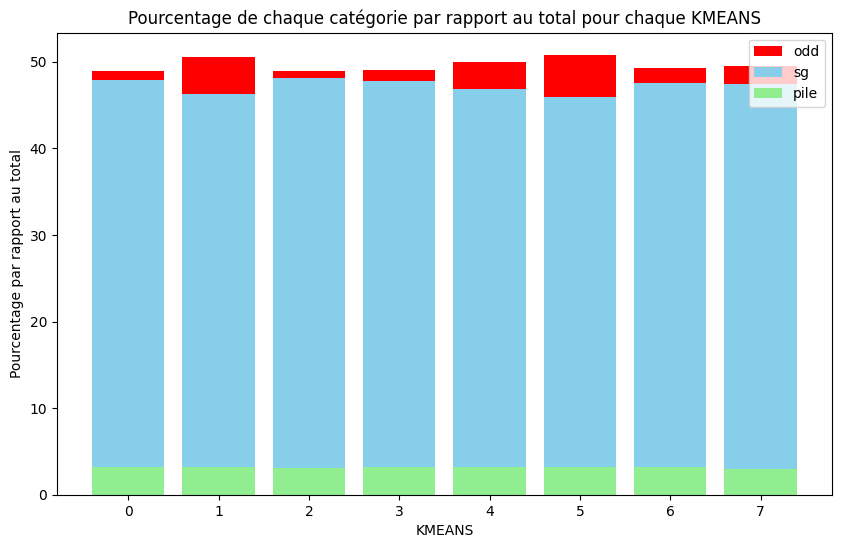

In [133]:
total_par_kmeans = donnees_odd['ID_ABONNE'] + donnees_sg['ID_ABONNE'] + donnees_pile['ID_ABONNE']

pourcentage_pile = (donnees_pile['ID_ABONNE'] / total_par_kmeans) * 100
pourcentage_odd = (donnees_odd['ID_ABONNE'] / total_par_kmeans) * 100
pourcentage_sg = (donnees_sg['ID_ABONNE'] / total_par_kmeans) * 100

plt.figure(figsize=(10, 6))

plt.bar(donnees_odd['KMEANS'], pourcentage_odd, color='red', label='odd')
plt.bar(donnees_sg['KMEANS'], pourcentage_sg, color='skyblue', label='sg')
plt.bar(donnees_pile['KMEANS'], pourcentage_pile, color='lightgreen', label='pile')

plt.xlabel('KMEANS')
plt.ylabel('Pourcentage par rapport au total')
plt.title('Pourcentage de chaque catégorie par rapport au total pour chaque KMEANS')
plt.xticks(donnees_odd['KMEANS'])
plt.legend()

plt.show()